In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
DDoS=pd.read_csv('/content/metasploitable-2.csv')

In [ ]:
DDoS.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [ ]:
DDoS['Label'].value_counts()

DDoS     73529
Probe    61757
DoS       1145
BFA        295
U2R         17
Name: Label, dtype: int64

In [ ]:
DDoS['Flow ID']=DDoS['Flow ID'].astype('category')
DDoS['Src IP']=DDoS['Src IP'].astype('category')
DDoS['Dst IP']=DDoS['Dst IP'].astype('category')
DDoS['Timestamp']=DDoS['Timestamp'].astype('category')
DDoS['Label'] = DDoS['Label'].astype('category')
cat_columns=DDoS.select_dtypes(['category']).columns
DDoS[cat_columns]=DDoS[cat_columns].apply(lambda X: X.cat.codes)

<Figure size 432x288 with 0 Axes>

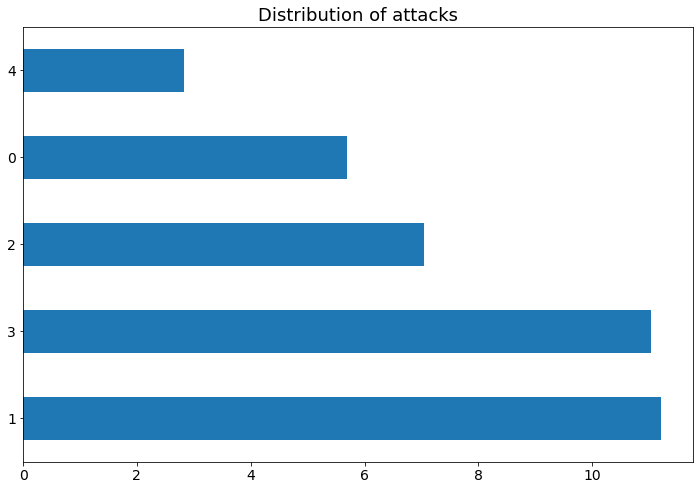

In [ ]:
#log scaled distribution of attacks
import matplotlib
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
DDoS['Label'].value_counts().apply(np.log).plot(kind='barh')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = DDoS[['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
y = DDoS['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
# define the model
model= TabNetClassifier(optimizer_fn=torch.optim.Adam,n_d=8,n_a=8,n_steps=3,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )

Device used : cpu


In [ ]:
# fit the model 
model.fit(
    X_train,y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy','accuracy'],
    max_epochs=20 , patience=10,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)    

epoch 0  | loss: 0.00905 | train_balanced_accuracy: 0.99214 | train_accuracy: 0.97892 | valid_balanced_accuracy: 0.94825 | valid_accuracy: 0.97806 |  0:00:18s
epoch 1  | loss: 0.0083  | train_balanced_accuracy: 0.99505 | train_accuracy: 0.98872 | valid_balanced_accuracy: 0.94759 | valid_accuracy: 0.98823 |  0:00:37s
epoch 2  | loss: 0.00242 | train_balanced_accuracy: 0.99999 | train_accuracy: 0.99997 | valid_balanced_accuracy: 0.95633 | valid_accuracy: 0.99985 |  0:01:02s
epoch 3  | loss: 0.00173 | train_balanced_accuracy: 0.9998  | train_accuracy: 0.99947 | valid_balanced_accuracy: 0.95247 | valid_accuracy: 0.9992  |  0:01:22s
epoch 4  | loss: 0.002   | train_balanced_accuracy: 0.99999 | train_accuracy: 0.99998 | valid_balanced_accuracy: 0.95629 | valid_accuracy: 0.99974 |  0:01:41s
epoch 5  | loss: 0.00023 | train_balanced_accuracy: 0.99999 | train_accuracy: 0.99998 | valid_balanced_accuracy: 0.95631 | valid_accuracy: 0.99978 |  0:02:03s
epoch 6  | loss: 0.00113 | train_balanced_accu

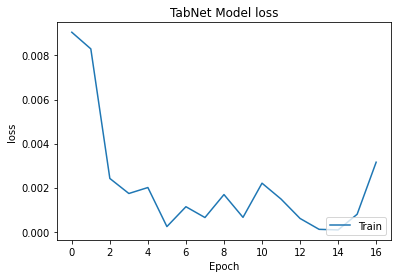

In [ ]:
# plot losses
plt.plot(model.history['loss'])
plt.title('TabNet Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TabNet Model loss.png')
plt.show()

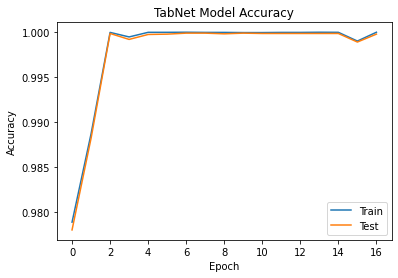

In [ ]:
# plot accuracy
plt.plot(model.history['train_accuracy'])
plt.plot(model.history['valid_accuracy'])
plt.title('TabNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TabNet Model Accuracy.png')
plt.show()

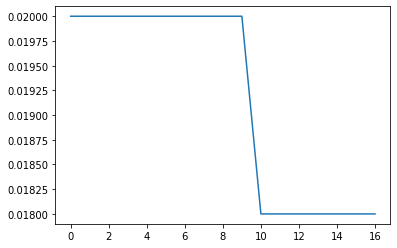

In [ ]:
# plot learning rates
plt.plot(model.history['lr'])

In [ ]:
# local explainability and masks
explain_matrix, masks = model.explain(X_test)

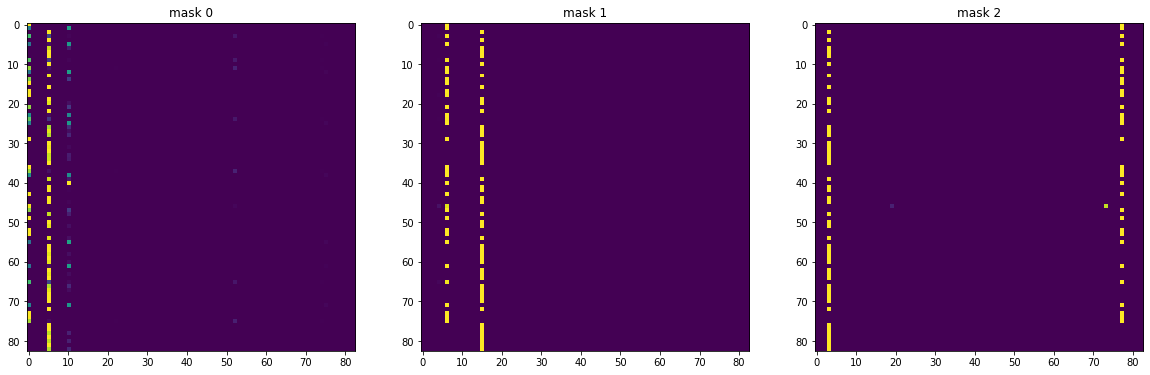

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:83])
    axs[i].set_title(f"mask {i}")

In [ ]:
#prediction
y_pred = model.predict(X_test)

In [ ]:
# determine best accuracy for test set
preds = model.predict(X_test)
test_acc = accuracy_score(preds, y_test)
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON TEST SET : 0.9998903067753848
